In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка данных и выбор необходимых признаков
df = pd.read_excel("C:/Users/User/Desktop/IVF/AI/DNN/обучение и валидация/all_df_with_KPI.xlsx")

selected_features = [
    "Возраст", "№ попытки", "Количество фолликулов", "Число ОКК",
    "Число инсеминированных", "2 pN", "Число дробящихся на 3 день",
    "Число Bl", "Число Bl хор.кач-ва", "Частота оплодотворения",
    "Частота дробления", "Частота формирования бластоцист",
    "Частота формирования бластоцист хорошего качества", "Частота получения ОКК",
    "Число эмбрионов 5 дня", "Заморожено эмбрионов", "День переноса", "Перенесено эмбрионов",
    "Исход переноса", "KPIScore"
]

# Оставить только выбранные признаки в датафрейме
df_selected = df.loc[:, selected_features]

# Замена отсутствующих значений на 0 в выбранных признаках
df_selected.fillna(0, inplace=True)

# Заменить значения, вызывающие проблемы, на NaN
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Удалить строки, содержащие NaN
df_selected.dropna(inplace=True)


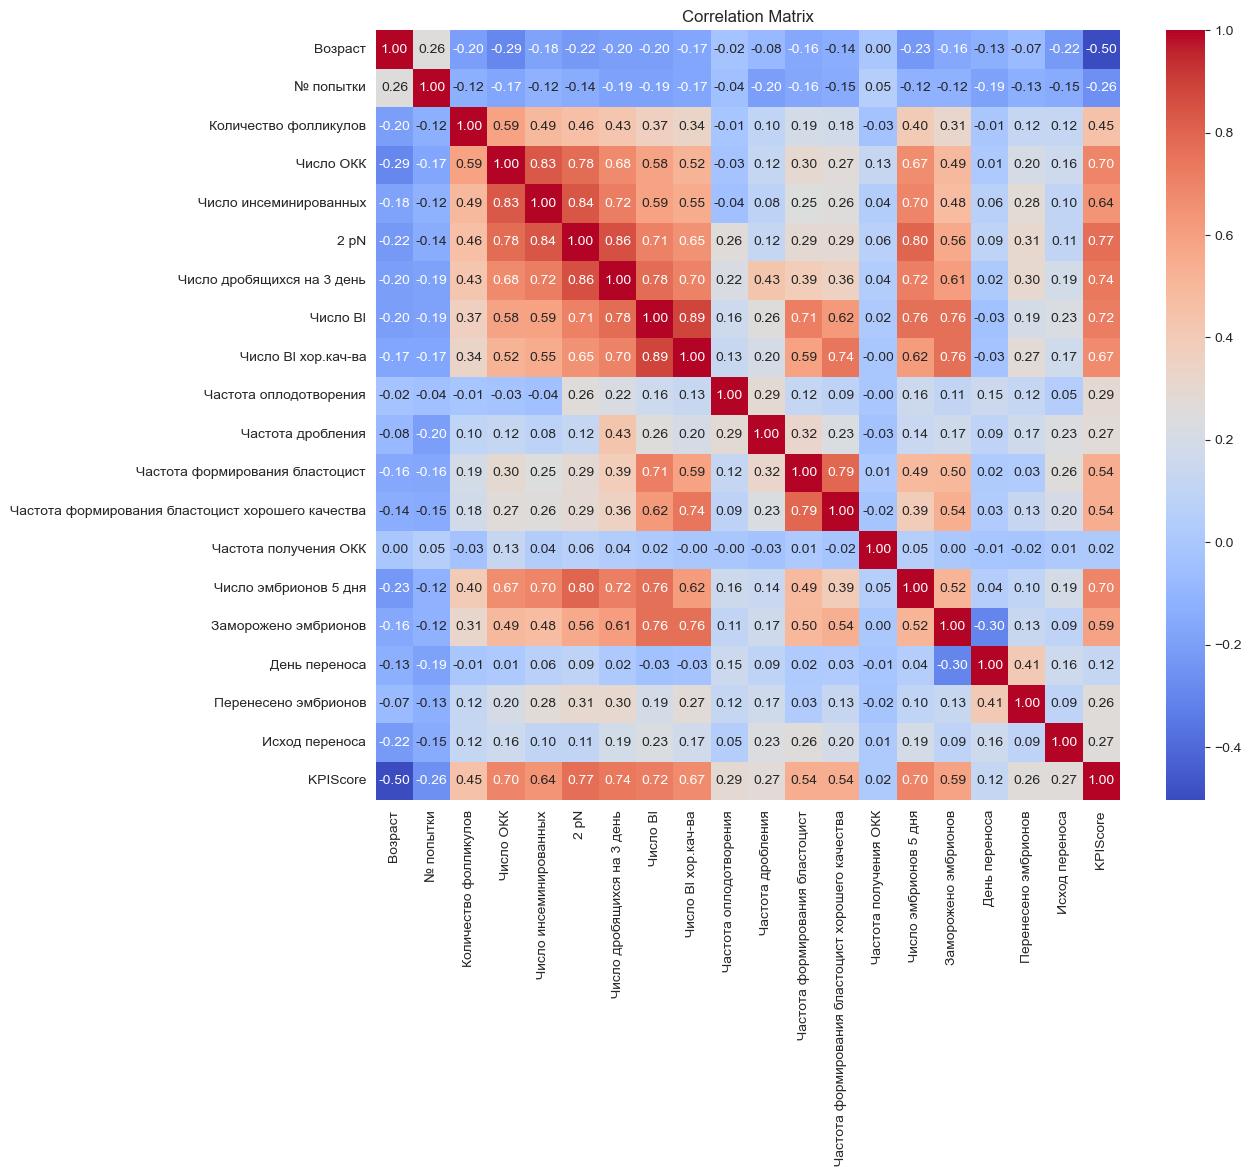

In [3]:
# Шаг 1: Корреляционная матрица
plt.figure(figsize=(12, 10))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [4]:
# Шаг 2: Расчет VIF

X = df_selected.drop(columns=["Исход переноса"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Вывод результатов VIF
print("Variance Inflation Factor (VIF) для признаков:")
print(vif_data)

Variance Inflation Factor (VIF) для признаков:
                                              Feature        VIF
0                                             Возраст  18.751110
1                                           № попытки   2.251216
2                               Количество фолликулов   2.498122
3                                           Число ОКК  12.076106
4                              Число инсеминированных  13.920542
5                                                2 pN  33.239758
6                          Число дробящихся на 3 день  19.592869
7                                            Число Bl  29.228919
8                                 Число Bl хор.кач-ва  18.970783
9                              Частота оплодотворения  13.643238
10                                  Частота дробления  15.675058
11                    Частота формирования бластоцист  14.306057
12  Частота формирования бластоцист хорошего качества  11.592100
13                              Частота пол

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, matthews_corrcoef
)

# Загрузка данных и выбор необходимых признаков
df = pd.read_excel("C:/Users/User/Desktop/IVF/AI/DNN/обучение и валидация/all_df_with_KPI.xlsx")

selected_features = [
    "Возраст", "№ попытки", "Количество фолликулов", "Число ОКК",
    "Число инсеминированных", "2 pN", "Число дробящихся на 3 день",
    "Число Bl", "Число Bl хор.кач-ва", "Частота оплодотворения",
    "Частота дробления", "Частота формирования бластоцист",
    "Частота формирования бластоцист хорошего качества", "Частота получения ОКК",
    "Число эмбрионов 5 дня", "Заморожено эмбрионов", "День переноса", "Перенесено эмбрионов",
    "Исход переноса", "KPIScore"
]

# Оставить только выбранные признаки в датафрейме
df_selected = df.loc[:, selected_features]
df_selected.fillna(0, inplace=True)
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
df_selected.dropna(inplace=True)

# Разделение признаков и целевого значения
X = df_selected.drop(columns=["Исход переноса"])
y = df_selected["Исход переноса"]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA, оставляя компоненты, объясняющие 95% дисперсии
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Обучение модели CatBoostClassifier на PCA-компонентах
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, silent=True, random_seed=42)
model.fit(X_train, y_train)

# Предсказания и расчёт вероятностей
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # вероятности для положительного класса

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
prc_auc = average_precision_score(y_test, y_proba)  # AUC для PRC
mcc = matthews_corrcoef(y_test, y_pred)

# Вывод метрик
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PRC-AUC:", prc_auc)
print("MCC:", mcc)


Accuracy: 0.7500846596681341
Precision: 0.5822784810126582
Recall: 0.4842105263157895
F1 Score: 0.5287356321839081
ROC-AUC: 0.7942738559140146
PRC-AUC: 0.5765198464780914
MCC: 0.36347981357643544


In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, matthews_corrcoef
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Загрузка данных и выбор необходимых признаков
df = pd.read_excel("C:/Users/User/Desktop/IVF/AI/DNN/обучение и валидация/all_df_with_KPI.xlsx")

selected_features = [
    "Возраст", "№ попытки", "Количество фолликулов", "Число ОКК",
    "Число инсеминированных", "2 pN", "Число дробящихся на 3 день",
    "Число Bl", "Число Bl хор.кач-ва", "Частота оплодотворения",
    "Частота дробления", "Частота формирования бластоцист",
    "Частота формирования бластоцист хорошего качества", "Частота получения ОКК",
    "Число эмбрионов 5 дня", "Заморожено эмбрионов", "День переноса", "Перенесено эмбрионов",
    "Исход переноса", "KPIScore"
]

# Оставить только выбранные признаки в датафрейме
df_selected = df.loc[:, selected_features]
df_selected.fillna(0, inplace=True)
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
df_selected.dropna(inplace=True)

# Разделение признаков и целевого значения
X = df_selected.drop(columns=["Исход переноса"])
y = df_selected["Исход переноса"]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA, оставляя компоненты, объясняющие 95% дисперсии
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Преобразование для RNN (требуется 3D-вход)
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Создание модели
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(SimpleRNN(16, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Обучение модели
model.fit(X_train_reshaped, y_train, epochs=12, batch_size=8, validation_split=0.2)

# Предсказания и расчёт вероятностей
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
y_proba = model.predict(X_test_reshaped).ravel()  # вероятности для положительного класса

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
prc_auc = average_precision_score(y_test, y_proba)  # AUC для PRC
mcc = matthews_corrcoef(y_test, y_pred)

# Вывод метрик
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PRC-AUC:", prc_auc)
print("MCC:", mcc)


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4848 - loss: 0.9995 - val_accuracy: 0.5832 - val_loss: 0.8999
Epoch 2/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5807 - loss: 0.9058 - val_accuracy: 0.6767 - val_loss: 0.8403
Epoch 3/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6544 - loss: 0.8473 - val_accuracy: 0.7008 - val_loss: 0.8058
Epoch 4/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6815 - loss: 0.8209 - val_accuracy: 0.7182 - val_loss: 0.7853
Epoch 5/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7089 - loss: 0.7986 - val_accuracy: 0.7211 - val_loss: 0.7733
Epoch 6/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7189 - loss: 0.7797 - val_accuracy: 0.7228 - val_loss: 0.7653
Epoch 7/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7203 - loss: 0.7725 - val_accuracy: 0.7262 - val_loss: 0.7587
Epoch 8/12
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7280 - loss: 0.7643 -